In [1]:
import sys
sys.path.append("../src")
import generate_load_save_data as data
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

dataset = data.load_data('../')

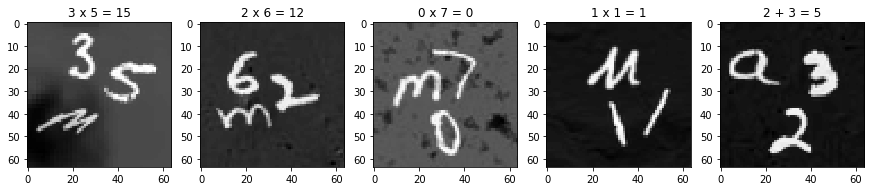

In [2]:
%matplotlib inline
N_INSTANCES = 5
fig, axes = plt.subplots(1, N_INSTANCES, figsize=(3 * N_INSTANCES,3))
for i, ax in enumerate(axes):
    x = dataset[i]
    ax.imshow(data.make_image(x['im'], True), cmap='gray')
    ax.set_title(x['title'])

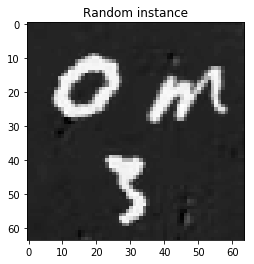

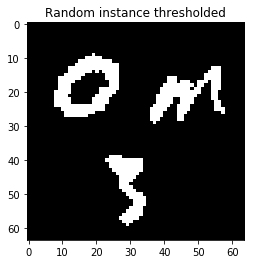

In [3]:
# Trying out some very simple thresholding technique
instance = dataset[np.random.randint(0, len(dataset))]
x = data.make_image(instance['im'], True)
plt.figure()
plt.imshow(x, cmap='gray')
plt.title('Random instance')

x_thresh = x > 128
plt.figure()
x = data.make_image(instance['im'], True)
plt.imshow(x_thresh, cmap='gray')
plt.title('Random instance thresholded');

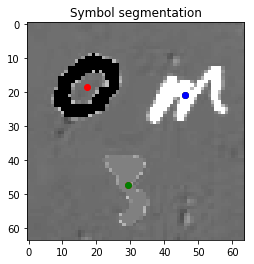

In [4]:
X, Y = np.nonzero(x_thresh)
X, Y = np.float32(X), np.float32(Y)
points = np.stack((X, Y), axis=1)
criteria = cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 50, 1.0
_, labels, centroids = cv.kmeans(points, 3, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
x[x_thresh != 0] = labels[:, 0] * 255 // 3
plt.figure()
plt.imshow(x, cmap='gray')
plt.plot(centroids[0:,1], centroids[0:,0], 'ro')
plt.plot(centroids[1:,1], centroids[1:,0], 'go')
plt.plot(centroids[2:,1], centroids[2:,0], 'bo')
plt.title('Symbol segmentation');

In [5]:
# Drawing bounding boxes to extract images for classification
def bounding_box(points):
    x_coordinates, y_coordinates = zip(*points)
    return (min(y_coordinates), min(x_coordinates)), (max(y_coordinates), max(x_coordinates))

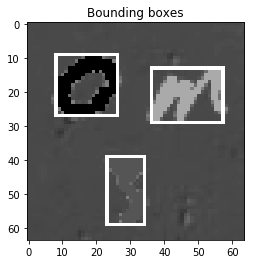

In [6]:
b1 = bounding_box(points[(labels == 0)[:,0]])
b2 = bounding_box(points[(labels == 1)[:,0]])
b3 = bounding_box(points[(labels == 2)[:,0]])

plt.figure()
cv.rectangle(x, b1[0], b1[1], 255)
cv.rectangle(x, b2[0], b2[1], 255)
cv.rectangle(x, b3[0], b3[1], 255)
plt.imshow(x, cmap='gray')
plt.title('Bounding boxes');